In [1]:
import random
import numpy as np
from collections import deque
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.optimizers import Adam
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
batch_size = 64

In [2]:
class DQNAgent:
    
    def __init__(self,state_size,action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.9995
        self.epsilon_min = 0.1
        self.learning_rate = 0.001
        self.model = self._build_model()
        
    def _build_model(self):
        
        model = Sequential()
        model.add(Dense(24, input_dim = self.state_size, activation = 'relu'))
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        model.compile(loss='mse',optimizer = Adam(lr = self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state):
        self.memory.append((state, action, reward, next_state))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
   
    def replay (self, batch_size):
        
        done = False
        minibatch = random.sample(self.memory, batch_size) 
        for (state, action, reward, next_state) in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            
            self.model.fit(state, target_f, epochs=1, verbose = 0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
    def save(self,name):                                                                                                 
        self.model.save(name)
    
    def load(self, name):
        new_model = tf.keras.models.load_model(name)

In [3]:
df = pd.read_csv('FullData_new.csv')
X = df.drop(['Id1','Id','Date','Adj Close'],1)
# y = df['Label1']
X_test = np.array(X)
# y_test = np.array(df['Label1'])

In [4]:
state_size = len(X_test[:][1])
action_size = 4
agent = DQNAgent(state_size,action_size)

Started..!
episode: 1/5000, score:-58682087.91600094, e: 1.0 , Win%: 43.29224075416969 %
episode: 2/5000, score:-55910266.39700089, e: 1.0 , Win%: 44.7535383113714 %
episode: 3/5000, score:-54608964.137000844, e: 1.0 , Win%: 44.620253164556964 %
episode: 4/5000, score:-53493639.19500093, e: 1.0 , Win%: 45.54210916275623 %
episode: 5/5000, score:3336881.996999978, e: 1.0 , Win%: 57.34401553775188 %
episode: 6/5000, score:3184518.100999972, e: 1.0 , Win%: 56.11888111888112 %
episode: 7/5000, score:3289889.2669999837, e: 1.0 , Win%: 56.043956043956044 %
episode: 8/5000, score:-57343206.541001216, e: 1.0 , Win%: 44.826744753538314 %
episode: 9/5000, score:-56767497.528998986, e: 1.0 , Win%: 42.6946847960445 %
episode: 10/5000, score:-55247331.48800089, e: 1.0 , Win%: 43.84692346173087 %
episode: 11/5000, score:3047477.7010000004, e: 1.0 , Win%: 54.71558729377001 %
episode: 12/5000, score:3299600.9269999936, e: 0.99 , Win%: 55.52554027504912 %
episode: 13/5000, score:3316670.7759999787, e: 

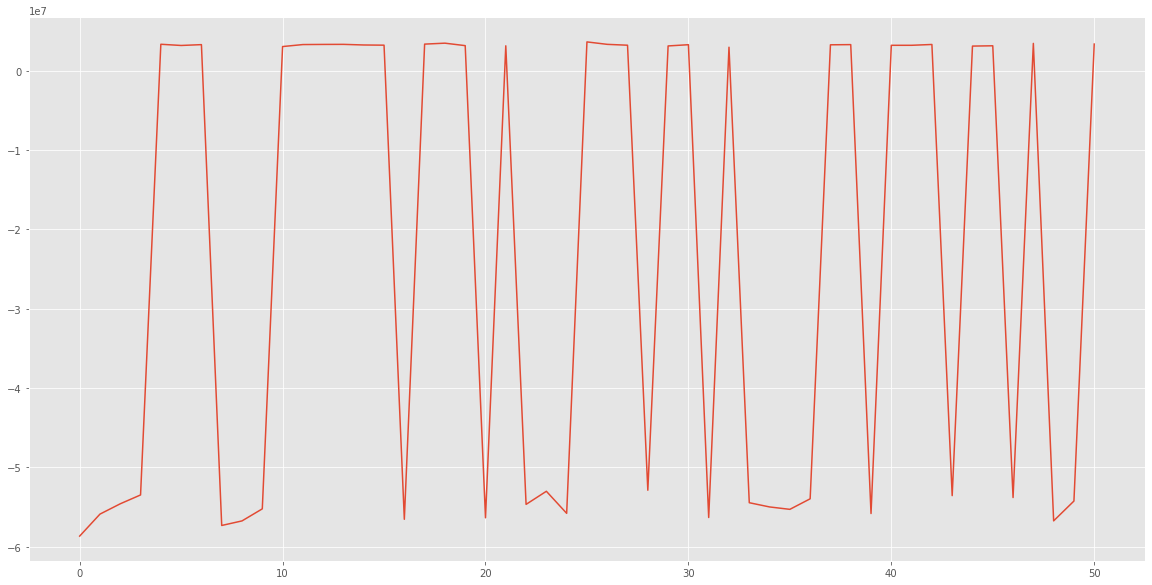

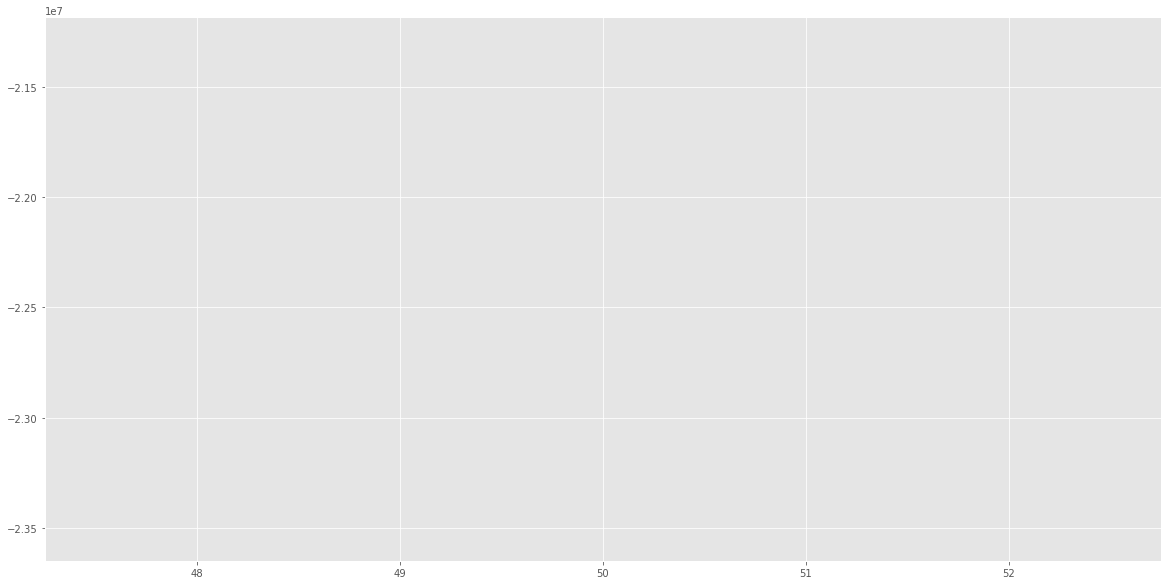

episode: 52/5000, score:3455271.317999995, e: 0.97 , Win%: 56.03661553686294 %
episode: 53/5000, score:3137794.3469999754, e: 0.97 , Win%: 55.344655344655344 %
episode: 54/5000, score:-54691808.03600089, e: 0.97 , Win%: 42.89020313705323 %
episode: 55/5000, score:3212901.9839999825, e: 0.97 , Win%: 55.4570091155457 %
episode: 56/5000, score:3113682.7789999917, e: 0.97 , Win%: 55.70589737043656 %
episode: 57/5000, score:-57347446.81200113, e: 0.97 , Win%: 42.183186951066496 %
episode: 58/5000, score:3228647.677000001, e: 0.97 , Win%: 56.57726692209451 %
episode: 59/5000, score:3143151.0820000386, e: 0.97 , Win%: 55.69524767412623 %
episode: 60/5000, score:3289382.0079999855, e: 0.97 , Win%: 55.70318375532715 %
episode: 61/5000, score:-53609434.057000995, e: 0.97 , Win%: 43.68609406952965 %
episode: 62/5000, score:2996938.91899999, e: 0.97 , Win%: 56.22612681436211 %
episode: 63/5000, score:3193308.9149999847, e: 0.97 , Win%: 55.50772347429729 %
episode: 64/5000, score:-54391616.87300096

In [ ]:
output_dir = 'Models'
n_episodes = 5000
Accuracy = []
Epoch = []
epo = []
acc = []
print('Started..!')
for e in range(n_episodes) :
#     state = env.reset()
        reward = 0.0
        done = False
        bid = 0.0
        act = 0
        count = 0
        pre = 0.0
        for i in range(len(X_test)-1):
#             print('Ongoing {} / {}'.format(i,len(X_test)), end = '\r')
            state = X_test[:][i]
            me = X['Close'][i]
            state = np.reshape(state, [1, state_size])
            action = agent.act(state)
            if action == 1 and act == 0:
                bid = me 
                act = 1

            elif action == 2 and act == 0:
                bid = me
                act = 2
            elif action == 3 and act != 0: 
                count += 1
                if act == 1: # Buy
                    r = (me - bid )
                    if r <=0:
                        reward += r*10000 -100
                    elif r > 0:
                        reward += r*1000
                        pre +=1
                else: # Sell
                    r = (bid - me)      
                    if r <=0:
                        reward += r*10000 -100
                    elif r > 0:
                        reward += r*1000
                        pre += 1
                act == 0
                bid == 0
            elif action == 0:
                reward += 1
    #         next_state, reward, done, _ = env.step(action) # Must edit
            next_state = X_test[:][i+1]
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state)
    #         state = next_state
        done = True
        if done:
            print("episode: {}/{}, score:{}, e: {:.2} , Win%: {} %".format(e+1,n_episodes, reward, agent.epsilon,(pre*100/count)))
            acc.append(reward)
            epo.append(e)

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        
        if e % 50 == 0 and e >0:
            Accuracy.append(np.mean(acc[-50:]))
            Epoch.append(e)
            plt.figure(figsize=(20,10))
            plt.plot(epo,acc)
            plt.figure(figsize=(20,10))
            plt.plot(Epoch,Accuracy) 
            plt.show()
        if e % 100 == 0 and e >0:
            agent.save(output_dir + "/model_" + '{:04d}'.format(e) + ".h5")
print('Done...')

In [ ]:
# print('hi', end = '\r')